# ML Project 13

+ Bu projede belirli bir etiket olmadığı için **unsupervised learning** kullanmaya çalışacağım. Teorik kısmına biraz hakimim, ne yaptığını biliyorum sadece. Nasıl yaptığına dair pek bir şey hatırlamıyorum. Kodlama kısmını hiç bilmiyorum, o yüzden baka baka yapacağım 

## Importing Libraries and Data

In [1]:
import os 
os.chdir("C:/Users/ogulc/ÖNEMLİ ÇALIŞMALAR")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
#Model
#Metrik

In [7]:
project_13 = pd.read_csv("Mall_Customers.csv")

In [8]:
project_13

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Analysing and Visualization Data (EDA) 

In [12]:
project_13.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


### .info()

In [9]:
project_13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### .shape

In [10]:
project_13.shape

(200, 5)

### .descirbe()

In [11]:
project_13.select_dtypes(include = ["int64", "float64"]).describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### .duplicated() and .drop_duplicates()

In [27]:
project_13.duplicated().sum()

np.int64(0)

### .isnull().sum()

In [28]:
project_13.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### .unique() and .nunique()

In [13]:
project_13["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
project_13["Spending Score (1-100)"].nunique()

84

### .value_counts() and Bar Graphs 

In [17]:
project_13["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

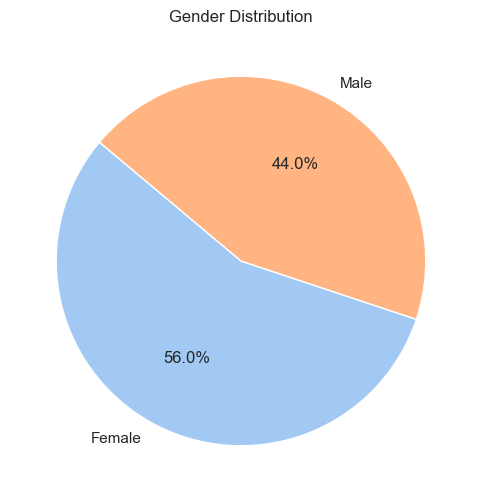

In [20]:
# Gender değerlerini saymak
gender_counts = project_13["Gender"].value_counts()

# Seaborn stilini kullanmak
sns.set(style="whitegrid")

# Pasta grafiği oluşturmak
plt.figure(figsize=(10, 6))
colors = sns.color_palette('pastel')[0:len(gender_counts)]
plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

# Başlık eklemek
plt.title('Gender Distribution')

# Göster
plt.show()

In [19]:
project_13["Spending Score (1-100)"].value_counts()

Spending Score (1-100)
42    8
55    7
73    6
46    6
48    5
     ..
68    1
85    1
23    1
8     1
18    1
Name: count, Length: 84, dtype: int64

### .corr(), .heatmap and Relation Graphs

<Axes: >

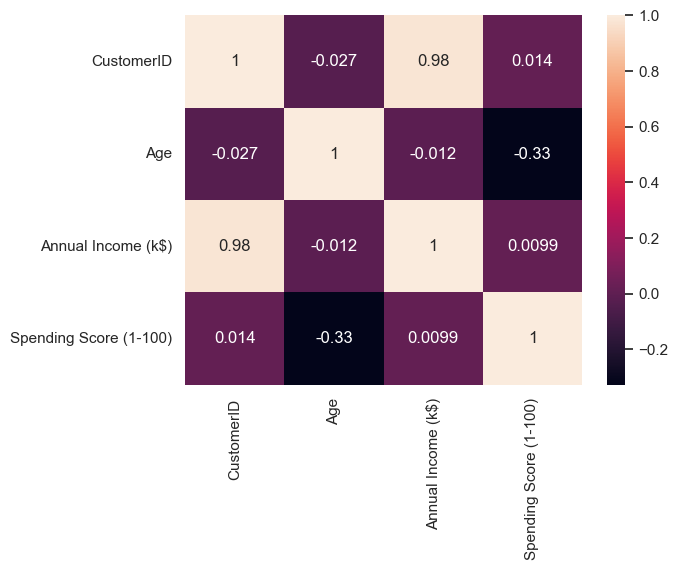

In [21]:
cor = project_13.select_dtypes(include = ["int64", "float64"]).corr()
sns.heatmap(cor, annot = True)

<Figure size 1200x800 with 0 Axes>

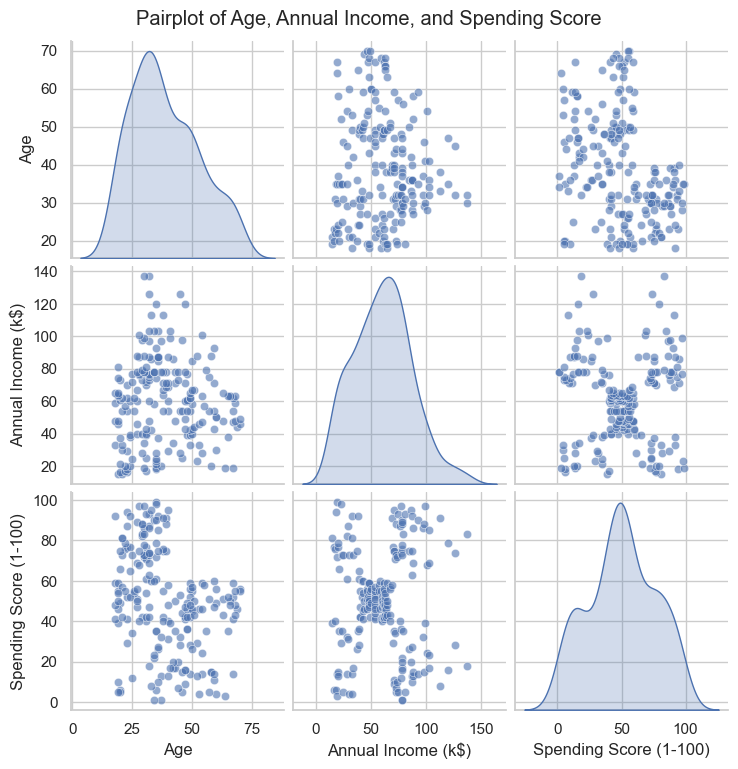

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gerekli sütunları seçmek
selected_columns = project_13[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Seaborn stilini kullanmak
sns.set(style="whitegrid")

# Pairplot oluşturmak
plt.figure(figsize=(12, 8))
sns.pairplot(selected_columns, diag_kind='kde', plot_kws={'alpha':0.6})

# Başlık eklemek
plt.suptitle('Pairplot of Age, Annual Income, and Spending Score', y=1.02)

# Göster
plt.show()

### DistPlot of Numeric Columns 

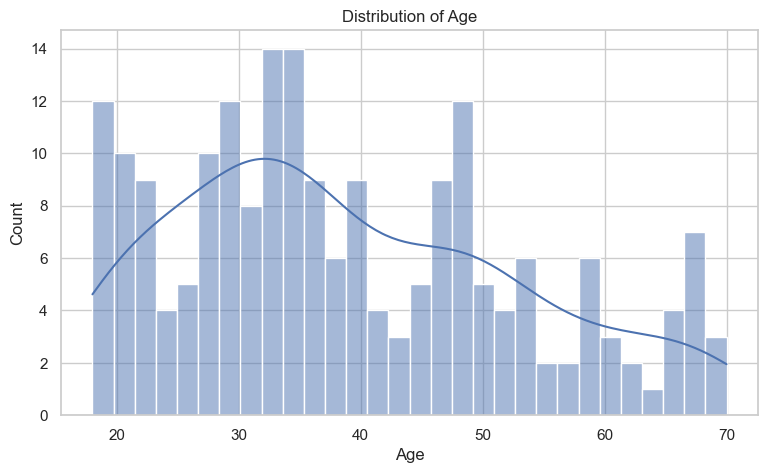

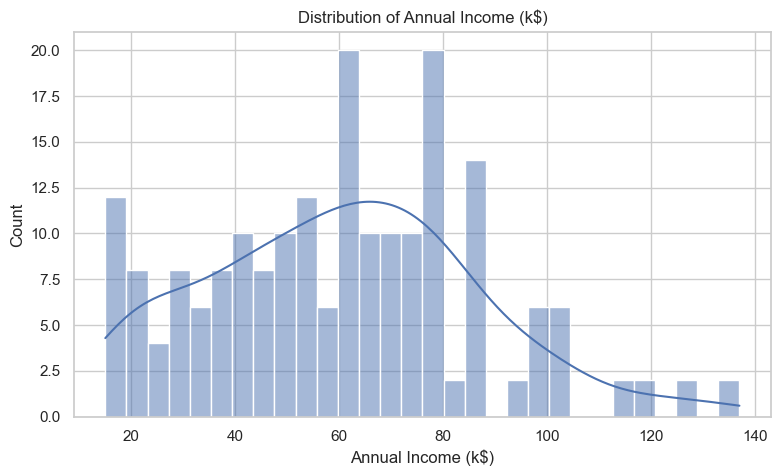

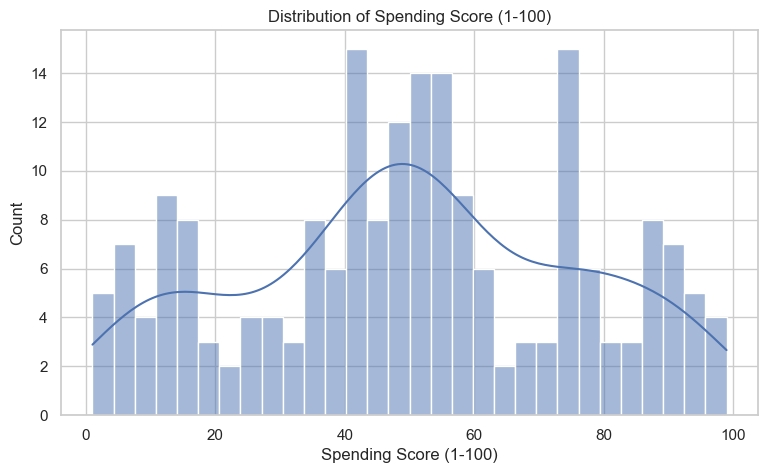

In [25]:
for column in project_13.select_dtypes(include = ["float64", "int64"]).drop(columns = "CustomerID", axis = 1):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=project_13, x=column, kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

## Yapılacaklar:

https://www.kaggle.com/code/kushal1996/customer-segmentation-k-means-analysis